# Topic 4 Assignemnt
For this assignment, there is only one question. You are responsible for completing all of the steps that you believe are required to fully answer that question based on the notes for Topic 4. You must provide insights throughout the analysis as well as a conclusion.

***This is a very DIFFICULT assignment. Please work through it the best that you can and try to think through the required steps, particularly during the second half.***

***Assignments should be uploaded in two formats to D2L. The first format is the .ipynb file that contains your code. The second format is an html file that you can obtain by File > Download As > HTML (.html).***

## Question 1

**Data Description:**
You will be responsible for downloading the data you need from Yahoo Finance.

**Context:**
You have just joined a portfolio management team here at MTSU Investment Advisors. As your first task, the team manager has asked you to complete the following project and report back. You must create a portfolio, determine the optimal weights for the portfolio by iterating through random weighting options, plot the efficient frontier, and use various portfolio performance metrics to determine if the portfolio is suitable for investment.

**Objective:**
- Select 3 securities to include in the portfolio and include at least 3 years of data.
- Obtain price data from Yahoo Finance and be sure to also obtain data for SPY to use as your market.
- Calculate portfolio returns and risk.
- Calcualte the portfolio risk if you invested in all 3 securities (not just 2 of the 3).
- Selecting just 2 of your 3 securities, create random portfolio weights and complete the remaining steps. You must invest at lest 85% of your portfolio in one of the securities. You can do this by using `import random` and then `random.uniform(lower bound, upper bound)` to ensure your random weight falls between the values of 85% and 100%.
- Identify the optimal portfolio
- Plot the Efficient Frontier - how does the requirement of 85% invested in one stock impact the efficient frontier?
- Make a second efficient frontier that does not have this same requirement - does this plot look more as your expected?
- Examine at least 3 different portfolio performance metrics - assume a risk free rate of 1%. You must compare the performance of your portfolio to the performance of the market as a benchmark.
- Determine if the portfolio is worth investing in relative to the alternative of investing in the market portfolio.

### Answer to Question 1

#### Hint 1: Import Libraries

In [128]:
import pandas as pd
import math
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Hint 2: Obtain stock returns for 3 stocks + SPY using yfinance

In [129]:
tickers_list = ['AAPL', 'GOOG', 'MSFT', 'SPY']
stock_prices = yf.download(tickers_list, start='2018-01-01', end='2023-12-31')['Adj Close']
stock_prices.index = pd.to_datetime(stock_prices.index)

stock_prices.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,GOOG,MSFT,SPY
Date,,,,
2018-01-02,40.670975,53.250000,80.229012,243.072250
2018-01-03,40.663891,54.124001,80.602379,244.609772
2018-01-04,40.852776,54.320000,81.311813,245.640717
2018-01-05,41.317902,55.111500,82.319901,247.277664
2018-01-08,41.164433,55.347000,82.403915,247.729874


In [130]:
price_return = stock_prices.pct_change()
price_return.dropna(inplace=True)

price_return

,AAPL,GOOG,MSFT,SPY
Date,,,,
2018-01-03,-0.000174,0.016413,0.004654,0.006325
2018-01-04,0.004645,0.003621,0.008802,0.004215
2018-01-05,0.011385,0.014571,0.012398,0.006664
2018-01-08,-0.003714,0.004273,0.001021,0.001829
2018-01-09,-0.000115,-0.000614,-0.000680,0.002264
...,...,...,...,...
2023-12-22,-0.005547,0.006488,0.002784,0.002010
2023-12-26,-0.002841,0.000701,0.000214,0.004223
2023-12-27,0.000518,-0.009663,-0.001575,0.001808


In [131]:
annual_return = price_return.mean()*252

annual_return

AAPL    0.309906
GOOG    0.211479
MSFT    0.303639
SPY     0.132968
dtype: float64

In [132]:
annual_sd = price_return.std()*math.sqrt(252)

annual_sd

AAPL    0.316770
GOOG    0.312258
MSFT    0.301238
SPY     0.203887
dtype: float64

#### Hint 3: Calculate portfolio returns and risk assuming a simple split of 33%, 33%, and 34% invested in each stock. 
You will need the covariance between each pair of securities in this part (ie. AMZN/DIS, AMZN/WMT, and DIS/WMT). This will extend out the formula for the portfolio standard deviation. Try to think through how this will change your formula from 2 stocks as we examined in the notes. Remember that you will need to extent the formula by including the weights of each security/pair and the covariance between that pair on the end of the formula. This will be the biggest challenge of this assignment. There are more efficient ways to do this calculate, but those are better saved for a portfolio theory course. For now, just calculate 3 separate covariance variables for each of the 3 pairs of securities.

In [133]:
# Weights of each stock
wx = .33
wy = .33
wz = .34

# Covariance of x and y, x and z, y and z
cov_x_y = np.cov(price_return['AAPL'], price_return['GOOG'])*252
cov_x_z = np.cov(price_return['AAPL'], price_return['MSFT'])*252
cov_y_z = np.cov(price_return['GOOG'], price_return['MSFT'])*252

# Portfolio return
port_return = wx*annual_return['AAPL'] + wy*annual_return['GOOG'] + wz*annual_return['MSFT']

# Portfolio risk
portfolio_std_dev = math.sqrt((wx**2)*(annual_sd['AAPL']**2) + 
                              (wy**2)*(annual_sd['GOOG']**2) + 
                              (wz**2)*(annual_sd['MSFT']**2) + 
                              2*wx*wy*wz*cov_x_y[0, 1]*cov_x_z[0,1]*cov_y_z[0,1])

print("The covariance of AAPL and GOOG: ", round(cov_x_y[0, 1], 4))
print("The covariance of AAPL and MSFT: ", round(cov_x_z[0, 1], 4))
print("The covariance of GOOG and MSFT: ", round(cov_y_z[0, 1], 4))
print(f'The portfolio return: {str(round(port_return*100, 2))}%.')
print(f"The portfolio standard deviation: {str(round(portfolio_std_dev*100, 2))}%.")

The covariance of AAPL and GOOG:  0.0667
The covariance of AAPL and MSFT:  0.0716
The covariance of GOOG and MSFT:  0.0719
The portfolio return: 27.53%.
The portfolio standard deviation: 17.91%.


#### Hint 3: Select just 2 of your 3 securities now. Calculate portfolio risk of your 2 stock portfolio. Change the stock weights by creating 500 random portfolios. Be sure invest at least 85% of your portfolio into one of the two stocks.

In [134]:
portfolio = pd.DataFrame()

# Number of portfolios
n = 500

# Calculate risk and returns for n random weight sets
for i in range(n):
    wy = np.random.random(1)[0]
    wz = 1-wy
    portfolio.loc[i, 'goog_weight'] = wy
    portfolio.loc[i, 'msft_weight'] = wz

    portfolio.loc[i, 'returns'] = wy * annual_return['GOOG'] + wz * annual_return['MSFT']
    portfolio.loc[i, 'std_dev'] = math.sqrt((wy**2)*(annual_sd['GOOG']**2) + (wz**2)*(annual_sd['MSFT']**2) + 2*wy*wz*cov_y_z[0, 1])
    portfolio.loc[i, 'returns per std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

# Max reward to risk weights
max_ret_by_std_dev = portfolio.iloc[portfolio['returns per std_dev'].idxmax()]
print('\nMax Ratio')
print(max_ret_by_std_dev)

# Max return weights
max_ret = portfolio.iloc[portfolio['returns'].idxmax()]
print('\nMax Return')
print(max_ret)

# Minimum risk weights
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
print('\nMin Risk')
print(min_std_dev)


Max Ratio
goog_weight            0.000381
msft_weight            0.999619
returns                0.303604
std_dev                0.301215
returns per std_dev    1.007931
Name: 45, dtype: float64

Max Return
goog_weight            0.000381
msft_weight            0.999619
returns                0.303604
std_dev                0.301215
returns per std_dev    1.007931
Name: 45, dtype: float64

Min Risk
goog_weight            0.424434
msft_weight            0.575566
returns                0.264523
std_dev                0.287639
returns per std_dev    0.919635
Name: 369, dtype: float64


#### Hint 4: Identify the optimal portfolio, plot all of the portfolios, and identify on the plot the optimal portfolio

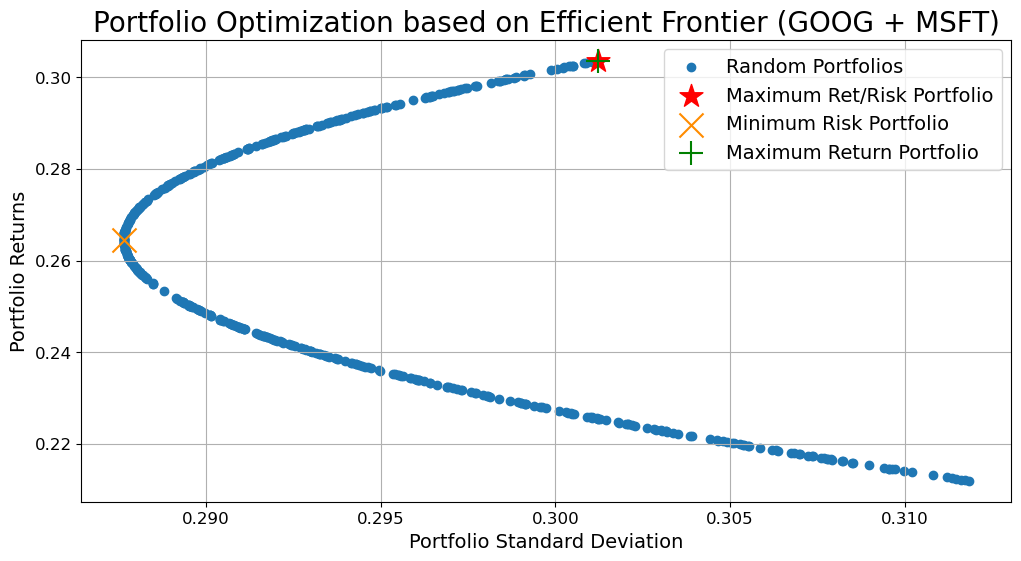

In [135]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')

plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=300, color='r', label='Maximum Ret/Risk Portfolio')

plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='x', s=300, color='darkorange', label='Minimum Risk Portfolio')

plt.scatter(max_ret.std_dev, max_ret.returns,
            marker='+', s=300, color='green', label='Maximum Return Portfolio')

plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier (GOOG + MSFT)', fontsize=20)
plt.show()

#### Hint 5: Redo the efficient frontier with no weight restrictions

In [136]:
portfolio = pd.DataFrame()

# Number of portfolios
n = 500

# Calculate risk and returns for n random weight sets
for i in range(n):
    wx = np.random.random(1)[0]
    wz = 1-wx
    portfolio.loc[i, 'aapl_weight'] = wx
    portfolio.loc[i, 'msft_weight'] = wz

    portfolio.loc[i, 'returns'] = wx * annual_return['AAPL'] + wz * annual_return['MSFT']
    portfolio.loc[i, 'std_dev'] = math.sqrt((wx**2)*(annual_sd['AAPL']**2) + (wz**2)*(annual_sd['MSFT']**2) + 2*wx*wz*cov_x_z[0, 1])
    portfolio.loc[i, 'returns per std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

# Max reward to risk weights
max_ret_by_std_dev = portfolio.iloc[portfolio['returns per std_dev'].idxmax()]
print('\nMax Ratio')
print(max_ret_by_std_dev)

# Max return weights
max_ret = portfolio.iloc[portfolio['returns'].idxmax()]
print('\nMax Return')
print(max_ret)

# Minimum risk weights
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
print('\nMin Risk')
print(min_std_dev)


Max Ratio
aapl_weight            0.434902
msft_weight            0.565098
returns                0.306364
std_dev                0.288318
returns per std_dev    1.062591
Name: 401, dtype: float64

Max Return
aapl_weight            0.991246
msft_weight            0.008754
returns                0.309851
std_dev                0.315979
returns per std_dev    0.980606
Name: 45, dtype: float64

Min Risk
aapl_weight            0.401607
msft_weight            0.598393
returns                0.306156
std_dev                0.288217
returns per std_dev    1.062240
Name: 101, dtype: float64


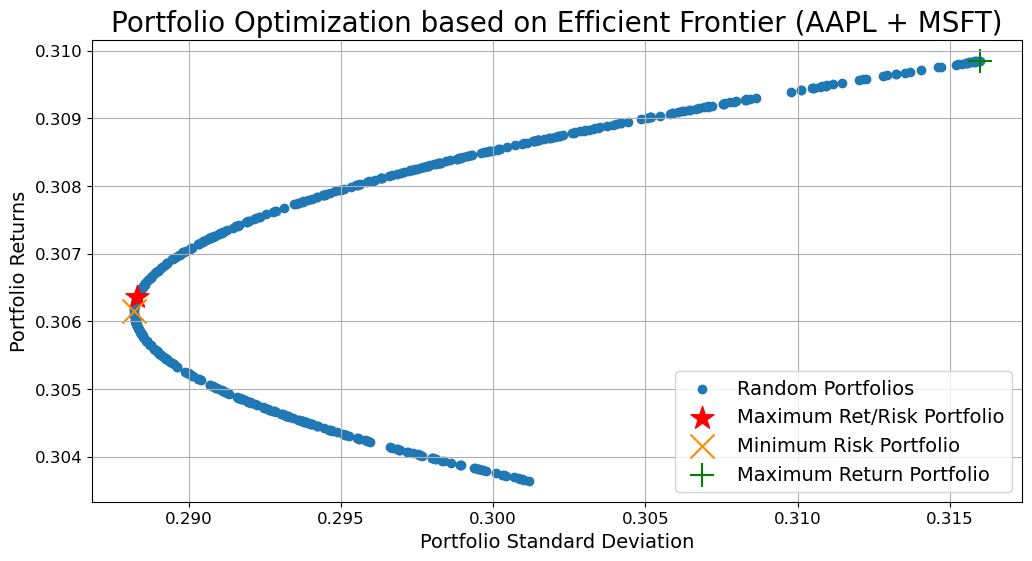

In [137]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')

plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=300, color='r', label='Maximum Ret/Risk Portfolio')

plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='x', s=300, color='darkorange', label='Minimum Risk Portfolio')

plt.scatter(max_ret.std_dev, max_ret.returns,
            marker='+', s=300, color='green', label='Maximum Return Portfolio')

plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier (AAPL + MSFT)', fontsize=20)
plt.show()

In [138]:
optimal_weights = max_ret_by_std_dev[["aapl_weight", "msft_weight"]]

print("The optimal weight of AAPL is: ", str(round(optimal_weights[0]*100, 2))+"%")
print("The optimal weight of MSFT is: ", str(round(optimal_weights[1]*100, 2))+"%")

The optimal weight of AAPL is:  43.49%
The optimal weight of MSFT is:  56.51%


#### Hint 6: Select 3 portfolio performance measures of your choice and evaluate the performance of the optimal portfolio. This will require you to take the original stock return file and add the optimal weights we just calculated to it. With the daily returns and the portfolio weights, we can calculate the daily portfolio returns.

In [139]:
# Create a new column in our daily return dataframe with optimally weighted portfolio returns

wx = max_ret_by_std_dev["aapl_weight"]
wy = max_ret_by_std_dev["msft_weight"]

price_return['portfolio'] = wx*price_return['AAPL'] + wy*price_return['MSFT']

print("The daily portfolio return data:\n")
price_return

The daily portfolio return data:



,AAPL,GOOG,MSFT,SPY,portfolio
Date,,,,,
2018-01-03,-0.000174,0.016413,0.004654,0.006325,0.002554
2018-01-04,0.004645,0.003621,0.008802,0.004215,0.006994
2018-01-05,0.011385,0.014571,0.012398,0.006664,0.011958
2018-01-08,-0.003714,0.004273,0.001021,0.001829,-0.001039
2018-01-09,-0.000115,-0.000614,-0.000680,0.002264,-0.000434
...,...,...,...,...,...
2023-12-22,-0.005547,0.006488,0.002784,0.002010,-0.000839
2023-12-26,-0.002841,0.000701,0.000214,0.004223,-0.001115
2023-12-27,0.000518,-0.009663,-0.001575,0.001808,-0.000665


##### Performance Measure: Annualized Returns

In [140]:
# Average daily and annual returns for our portfolio and the market

daily_return = price_return['portfolio'].mean()
annual_return = daily_return*252
market_return = price_return["SPY"].mean()
annual_market_return = market_return*252

print("The mean daily return of our portfolio is", str(round(daily_return*100, 2)) + "%.")
print("The mean annual return of our portfolio is", str(round(annual_return*100, 2)) + "%.")
print("The mean daily return of the market is", str(round(market_return*100, 2)) + "%.")
print("The mean annual return of the market is", str(round(annual_market_return*100, 2)) + "%.")

The mean daily return of our portfolio is 0.12%.
The mean annual return of our portfolio is 30.64%.
The mean daily return of the market is 0.05%.
The mean annual return of the market is 13.3%.


In [141]:
print(daily_return / price_return['portfolio'].std())
print(market_return / price_return["SPY"].std())

0.06693692103352845
0.04108255363971173


##### Performance Measure: Beta

In [142]:
# Beta using a regression model

reg = sm.OLS(price_return['portfolio'], price_return['SPY'])
results = reg.fit()

print('Portfolio Beta: %.2f' % results.params[0])

Portfolio Beta: 1.23


In [143]:
# Beta calculated using covariance between SPY and portfolio returns

covariance_matrix = price_return[['SPY', 'portfolio']].cov()
covariance_value = covariance_matrix.iloc[0]['portfolio']
market_variance = price_return['SPY'].var()

beta = covariance_value/market_variance

'Portfolio Beta: %.2f' % beta

'Portfolio Beta: 1.23'

##### Performance Measure: Annualized Volatility

In [144]:
# Annualized volatility is the std dev times the square root of the number of trading days

trading_days = 252

daily_std_dev = price_return['portfolio'].std()

annual_volatility = daily_std_dev * np.sqrt(trading_days) * 100

'The annualized volatility is %.2f%%.' % annual_volatility

'The annualized volatility is 28.83%.'

##### Performance Measures: Sharpe, Treynor, and Information Ratios

In [160]:
# We assume an annual risk-free rate of 2%
rf = .01

# Divide the annual rf by the number of trading days
daily_risk_free_return = rf/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = price_return['portfolio'] - daily_risk_free_return

sharpe_ratio = (excess_daily_returns.mean() / excess_daily_returns.std()) * np.sqrt(trading_days)

'The Sharpe ratio is %.2f' % sharpe_ratio

'The Sharpe ratio is 1.03'

In [161]:
# The Treynor ratio evaluates excess return per unit of systematic risk (Beta)

treynor_ratio = (excess_daily_returns.mean()*trading_days)/beta

'The Treynor ratio is %.2f' % treynor_ratio

'The Treynor ratio is 0.24'

In [162]:
# The Information ratio shows us excess return to excess risk

information_ratio = (daily_return - price_return['SPY'].mean()) / (price_return['portfolio'] - price_return['SPY']).std() * np.sqrt(trading_days)

'The Information ratio is %.2f' % information_ratio

'The Information ratio is 1.16'

#### Hint 7: Depending on your performance measures, you may need the market return. You can use `SPY` as the market return.
* See above

#### Hint 8: Using your performance metrics, evaluate this portfolio in plain english (ie. would you invest in it?).

* The average daily returns and annual returns for our portfolio are more than double the S&P500's.
* The Beta, representing systematic risk, is 1.23, meaning our portfolio is more volatile than the market.
* The annualized volatility is lower than our annual return, which is a good sign but doesn't say much else on its own.
* The Sharpe ratio is considered good if it's higher than 1; ours is and that's even with our portfolio only being two stocks.
* The Treynor ratio doesn't tell us much because we don't have a well-diversified portfolio; the ratio would be more useful if we had already diversified away the non-systematic risk.
* The Information ratio tells us our excess return to excess risk is excellent. This means our portfolio is a consistent performer.

Taking this into account, our portfolio's main risk comes from not being diversified. With that being said, the returns, Sharpe ratio and Information ratio make this portfolio an attractive investment alternative to the market. It could likely be improved, however, by adding in more stocks.